<a href="https://colab.research.google.com/github/slstyrn21/Pengolahan-Citra-Project/blob/main/Program_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
from pylab import *
from PIL import Image
from copy import deepcopy

In [ ]:
# membaca gambar

img_terang = io.imread("/terang.jpg")
img_sedang = io.imread("/sedang.jpg")
img_gelap = io.imread("/gelap.jpg")

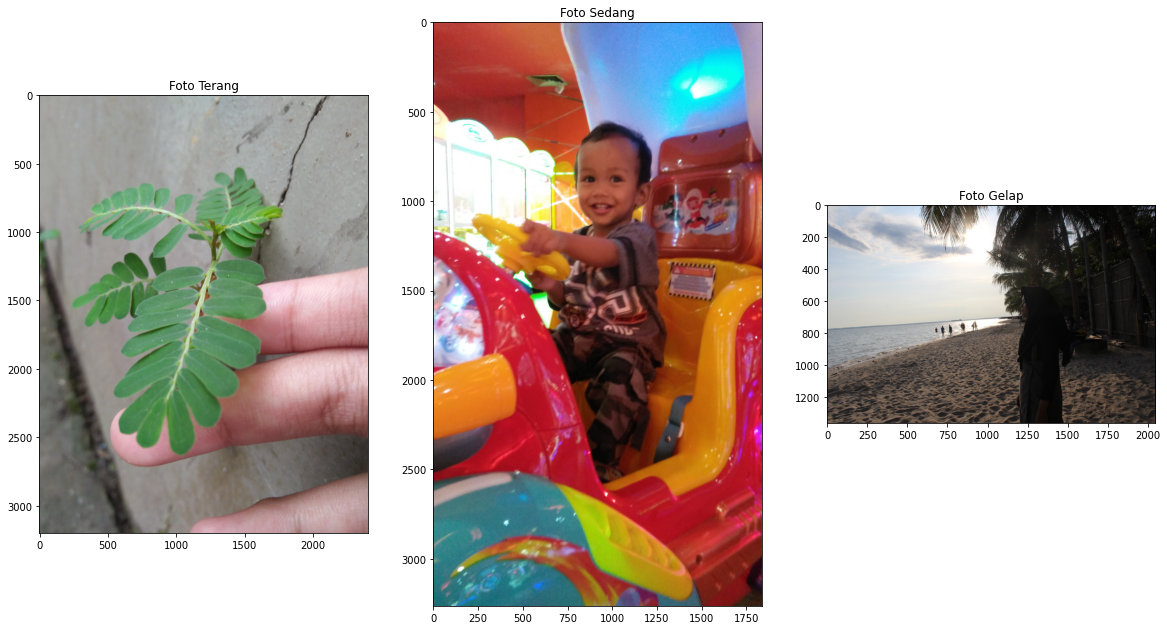

In [ ]:
# menampilkan gambar asli

def show_asli():
  fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,15))

  ax[0].imshow(img_terang)
  ax[0].set_title('Foto Terang')
  ax[1].imshow(img_sedang)
  ax[1].set_title('Foto Sedang')
  ax[2].imshow(img_gelap)
  ax[2].set_title('Foto Gelap')

show_asli()

In [ ]:
# fungsi untuk memecah gambar ke dalam berbagai channel (R,G,B) dan menyimpannya

def rgb_channel(img, jpg1, jpg2, jpg3):
  red_channel = deepcopy(img)
  green_channel = deepcopy(img)
  blue_channel = deepcopy(img)

  red_channel[:,:,1] = 0
  red_channel[:,:,2] = 0

  green_channel[:,:,0] = 0
  green_channel[:,:,2] = 0

  blue_channel[:,:,0] = 0
  blue_channel[:,:,1] = 0

  # fungsi yang mengembalikan tupel yang berisi gambar dan objek sumbu
  fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,15))

  ax[0].imshow(img)
  ax[0].set_title('Original')

  ax[1].imshow(red_channel)
  ax[1].set_title('Red Channel')

  ax[2].imshow(green_channel)
  ax[2].set_title('Green Channel')

  ax[3].imshow(blue_channel)
  ax[3].set_title('Blue Channel')

  # menyimpan gambar ke device
  cv2.imwrite(jpg1, blue_channel)
  cv2.imwrite(jpg2, green_channel)
  cv2.imwrite(jpg3, red_channel)

  # menampilkan subplots
  plt.show()

<Figure size 432x288 with 0 Axes>

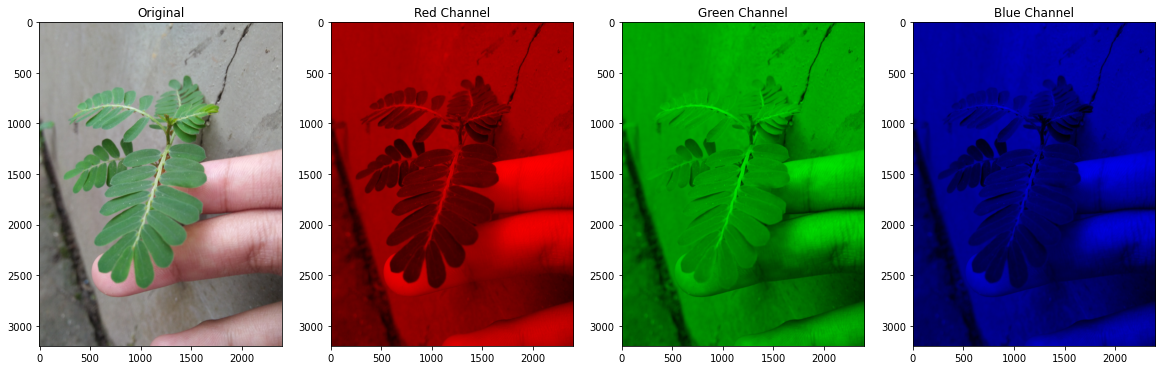

<Figure size 432x288 with 0 Axes>

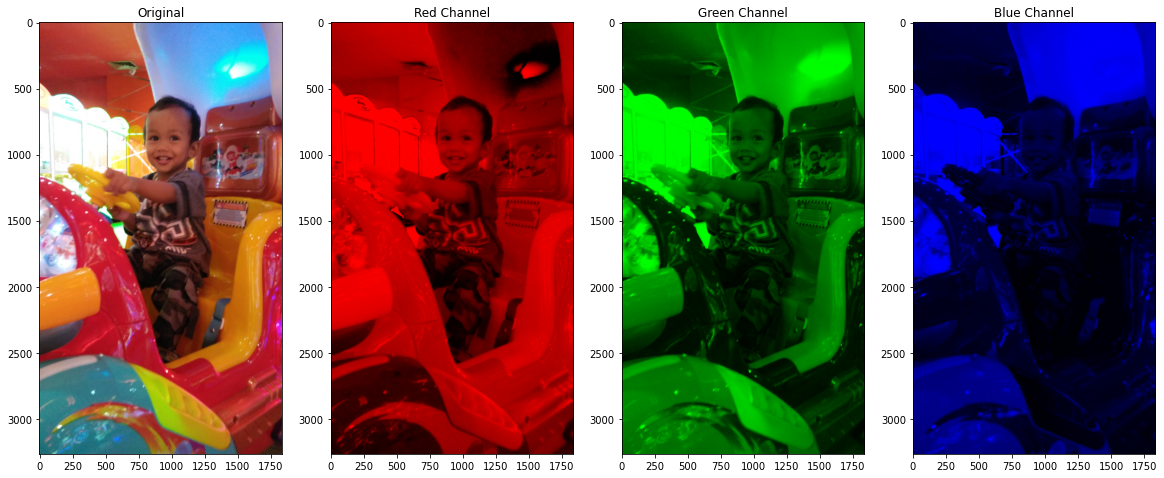

<Figure size 432x288 with 0 Axes>

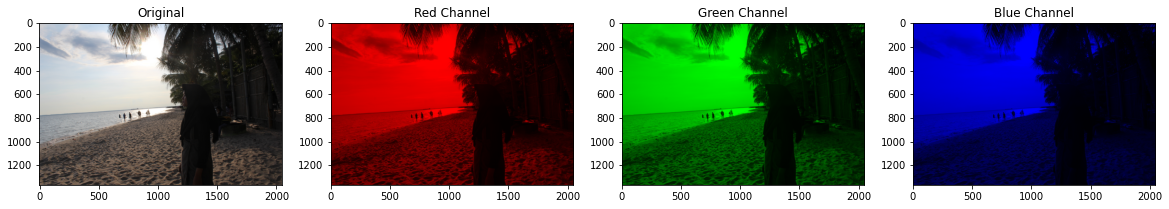

In [ ]:
# menampilkan photo per-channel

def rgb_photo():
  figure(0)
  rgb_channel(img_terang, "/red_terang.jpg", "/green_terang.jpg", "/blue_terang.jpg")
  figure(1) 
  rgb_channel(img_sedang, "/red_sedang.jpg", "/green_sedang.jpg", "/blue_sedang.jpg")
  figure(2)
  rgb_channel(img_gelap, "/red_gelap.jpg", "/green_gelap.jpg", "/blue_gelap.jpg")

rgb_photo()

In [ ]:
# fungsi histogram all channel 256 bins menampilkan 3 foto berbeda (terang, sedang, gelap)

def histogram(image, title):
  img = cv2.imread(image)
  r, g, b = cv2.split(img)

  fig, axs = plt.subplots(1, 4, figsize=(20,5))
  axs[0].set_title(title)
  axs[0].hist(img.ravel(), 256, [0,256], color='black')
  axs[1].set_title("Histogram Channel R (256 Bins)")
  axs[1].hist(r.ravel(), 256, [0,256], color='red')
  axs[2].set_title("Histogram Channel G (256 Bins)")
  axs[2].hist(g.ravel(), 256, [0,256], color='green')
  axs[3].set_title("Histogram Channel B (256 Bins)")
  axs[3].hist(b.ravel(), 256, [0,256], color='blue')

<Figure size 432x288 with 0 Axes>

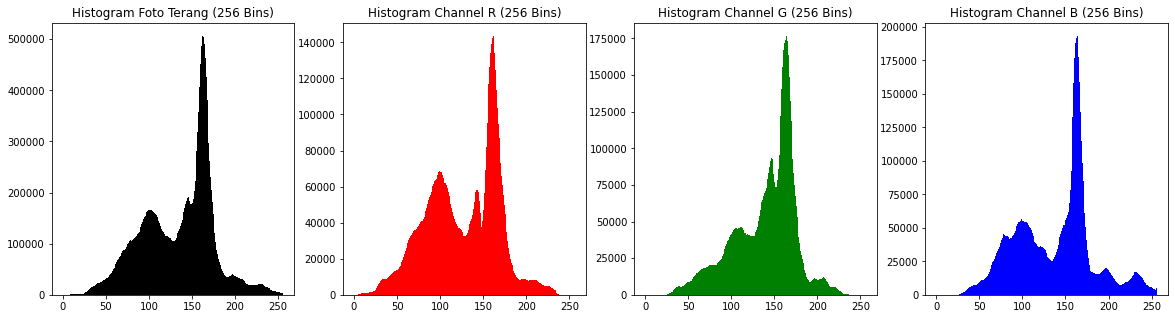

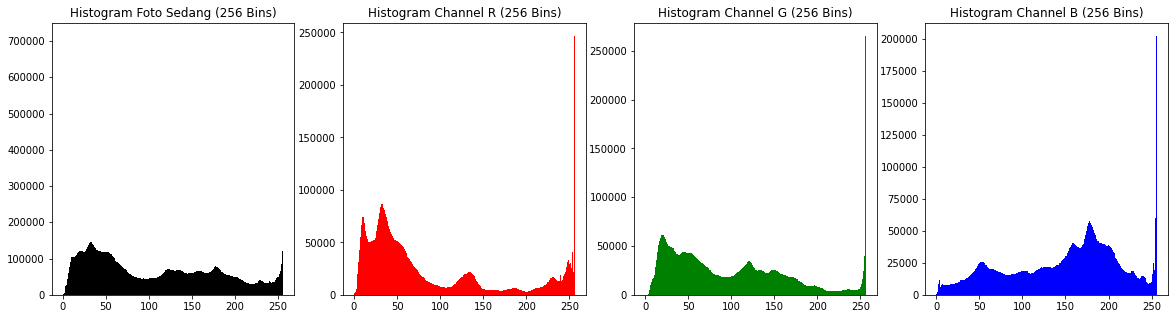

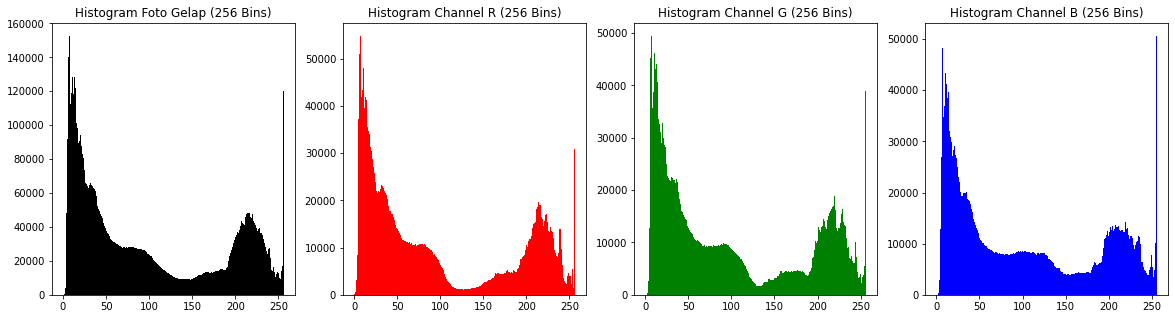

In [ ]:
# menampilkan fungsi histogram(image, title)

figure(0)
histogram("/terang.jpg","Histogram Foto Terang (256 Bins)")
figure(1)
histogram("/sedang.jpg","Histogram Foto Sedang (256 Bins)")
figure(2)
histogram("/gelap.jpg","Histogram Foto Gelap (256 Bins)")

In [ ]:
# fungsi untuk memecah foto menjadi channel R, G, B sesuai banyak bins

def rgb_bins(image, bins, title, titleR, titleG, titleB):
  img = Image.open(image)
  lebar, tinggi = (img.size)

  listR = []
  listG = []
  listB = []

  for x in range(lebar):
    for y in range(tinggi):
      r, g, b = img.getpixel((x,y))
      listR.append(r)
      listG.append(g)
      listB.append(b)

  fig, axs = plt.subplots(1, 3, figsize=(20,5))

  axs[0].set_title(titleR)
  axs[0].hist(listR, bins, facecolor='red', alpha=0.5)
  axs[1].set_title(titleG)
  axs[1].hist(listG, bins, facecolor='green', alpha=0.5)
  axs[2].set_title(titleB)
  axs[2].hist(listB, bins, facecolor='blue', alpha=0.5)
  plt.show()

In [ ]:
# menampilkan photo R,G,B ke dalam 1 baris

def show_rgb(red, green, blue):
  img1 = io.imread(red)
  img2 = io.imread(green)
  img3 = io.imread(blue)

  fig, axs = plt.subplots(1, 3, figsize=(20,15))
  axs[0].set_title("Channel R Photo")
  axs[0].imshow(img1)
  axs[1].set_title("Channel G Photo")
  axs[1].imshow(img2)
  axs[2].set_title("Channel B Photo")
  axs[2].imshow(img3)

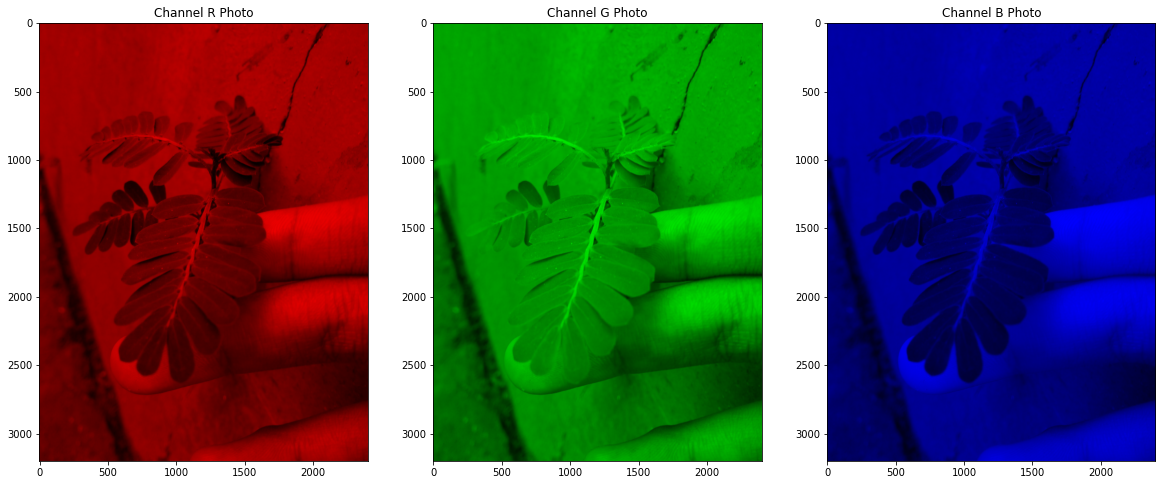

<Figure size 432x288 with 0 Axes>

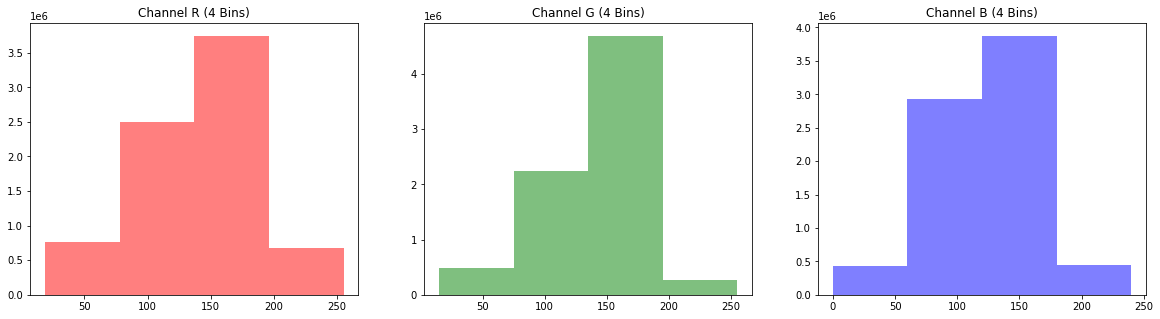

<Figure size 432x288 with 0 Axes>

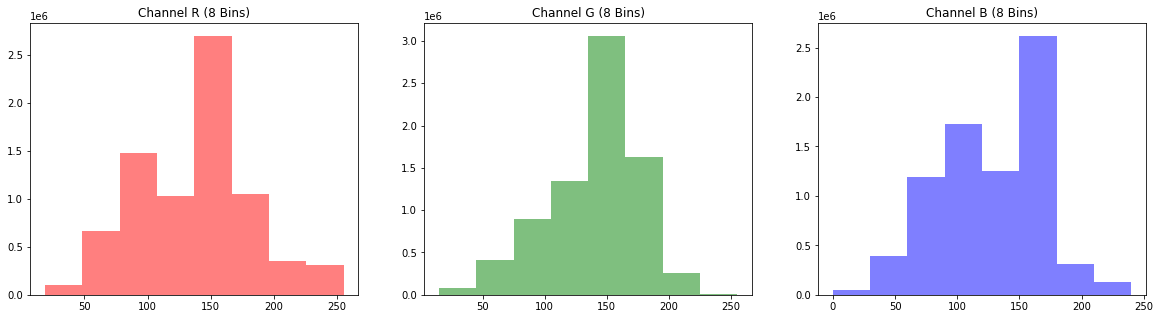

<Figure size 432x288 with 0 Axes>

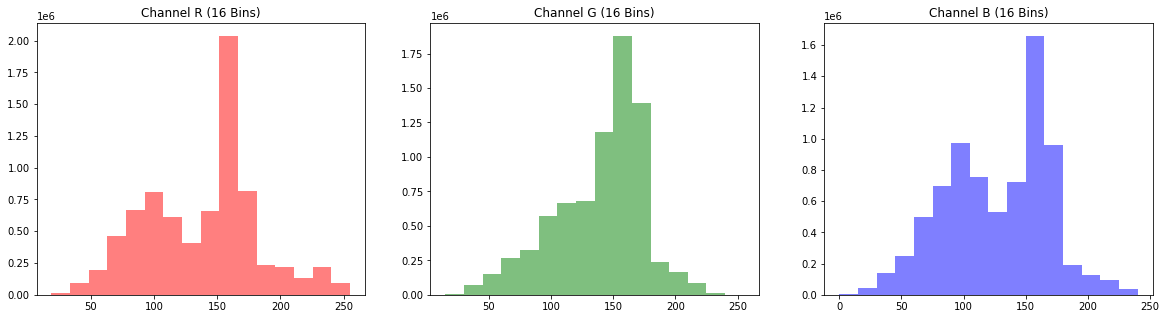

<Figure size 432x288 with 0 Axes>

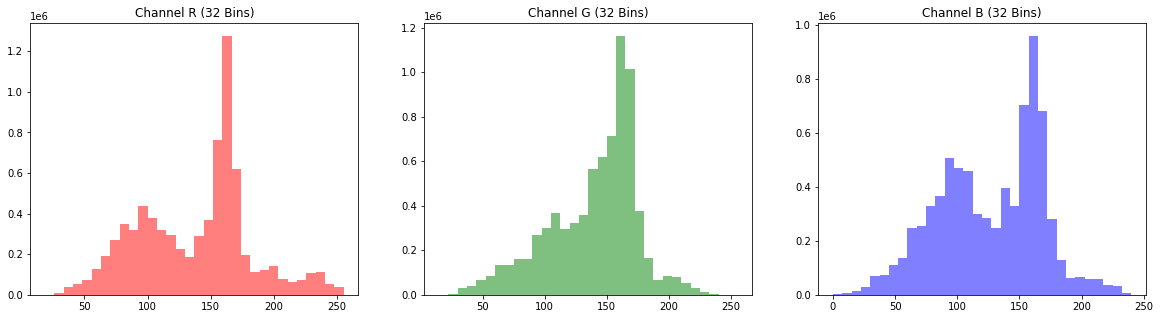

<Figure size 432x288 with 0 Axes>

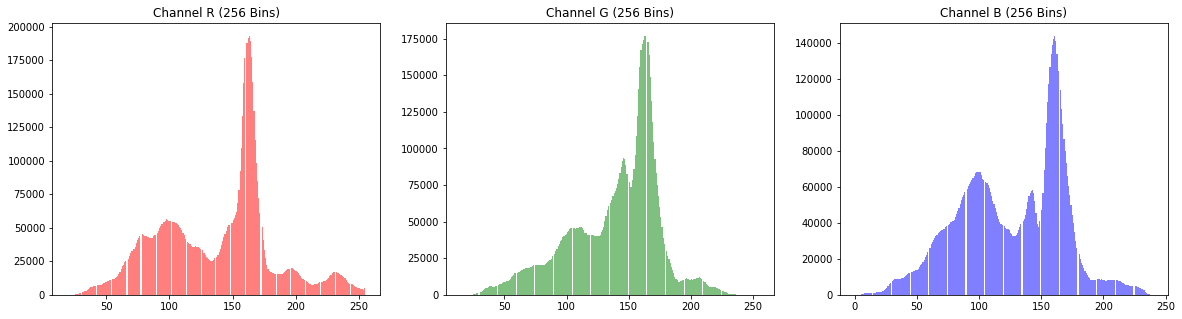

In [ ]:
# foto terang per-channel dan per-bins

def terang_bins():
  show_rgb("/red_terang.jpg", "/green_terang.jpg", "/blue_terang.jpg")
  figure(0)
  rgb_bins("/terang.jpg", 4, "Foto Terang", "Channel R (4 Bins)", "Channel G (4 Bins)", "Channel B (4 Bins)")
  figure(1) 
  rgb_bins("/terang.jpg", 8, "Foto Terang", "Channel R (8 Bins)", "Channel G (8 Bins)", "Channel B (8 Bins)")
  figure(2)
  rgb_bins("/terang.jpg", 16, "Foto Terang", "Channel R (16 Bins)", "Channel G (16 Bins)", "Channel B (16 Bins)")
  figure(3)
  rgb_bins("/terang.jpg", 32, "Foto Terang", "Channel R (32 Bins)", "Channel G (32 Bins)", "Channel B (32 Bins)")
  figure(4)
  rgb_bins("/terang.jpg", 256, "Foto Terang", "Channel R (256 Bins)", "Channel G (256 Bins)", "Channel B (256 Bins)")

terang_bins()

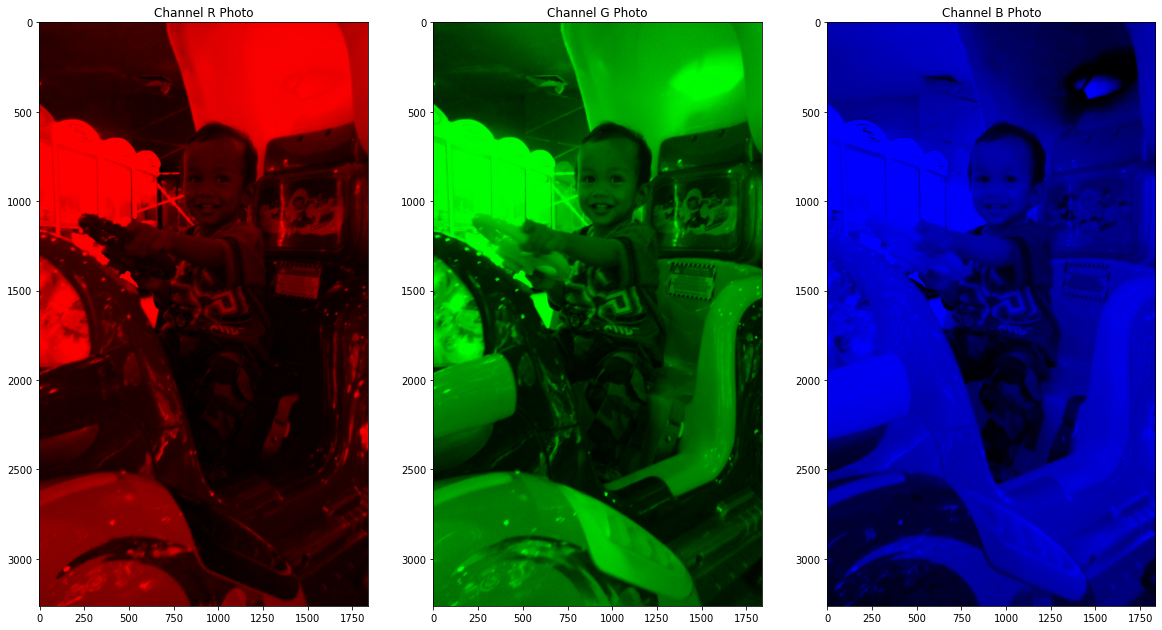

<Figure size 432x288 with 0 Axes>

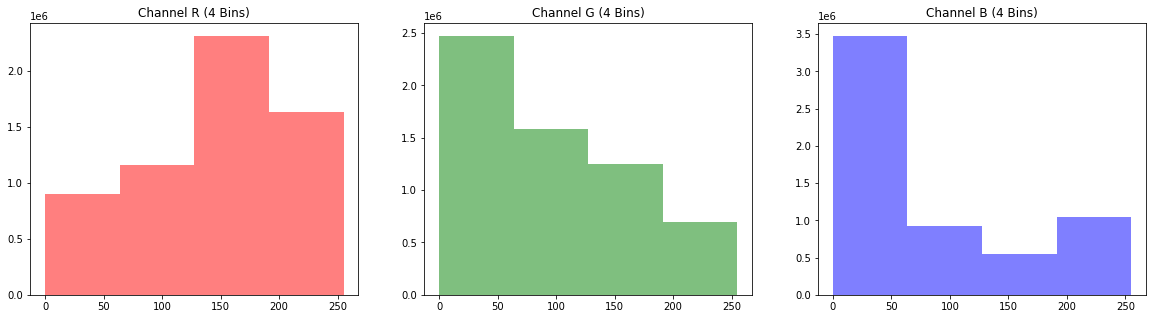

<Figure size 432x288 with 0 Axes>

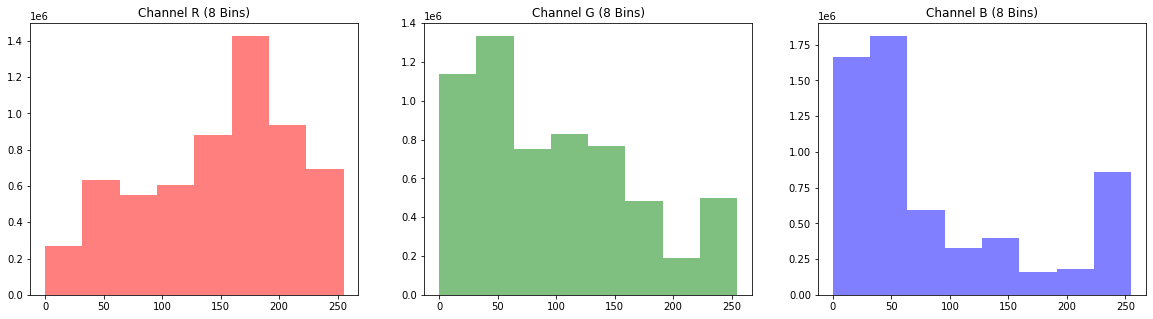

<Figure size 432x288 with 0 Axes>

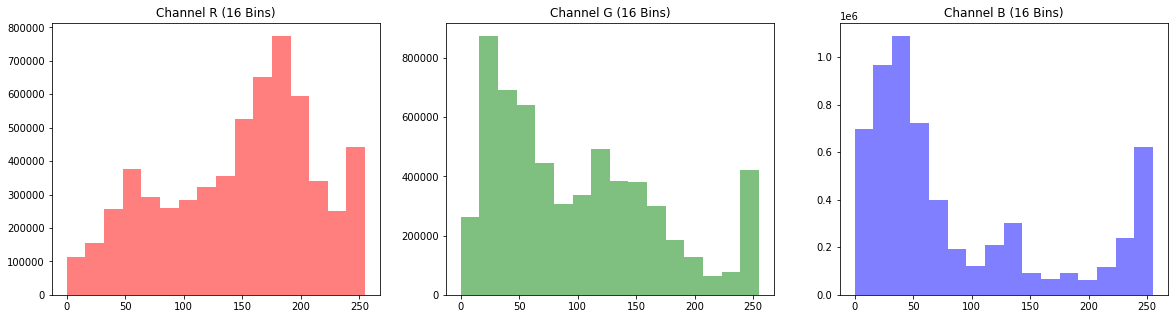

<Figure size 432x288 with 0 Axes>

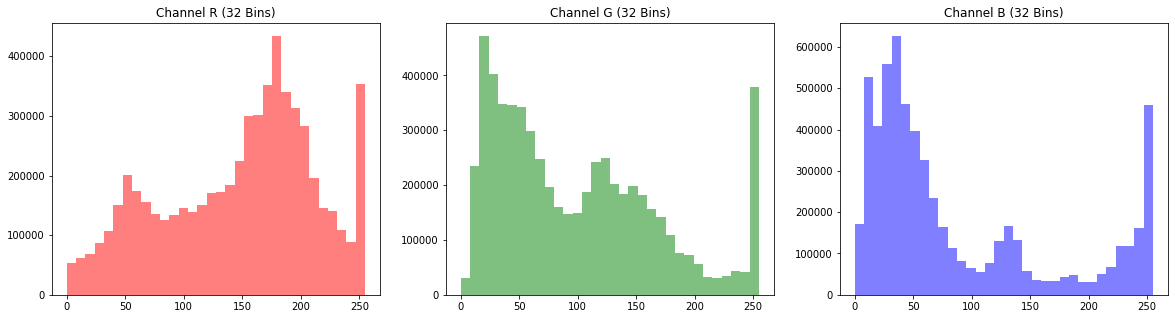

<Figure size 432x288 with 0 Axes>

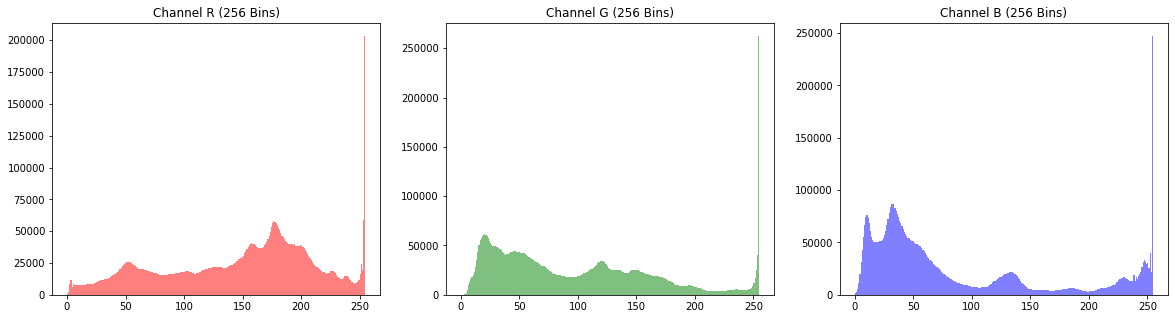

In [ ]:
# foto sedang per-channel dan per-bins

def sedang_bins():
  show_rgb("/red_sedang.jpg", "/green_sedang.jpg", "/blue_sedang.jpg")
  figure(0)
  rgb_bins("/sedang.jpg", 4, "Foto Sedang", "Channel R (4 Bins)", "Channel G (4 Bins)", "Channel B (4 Bins)")
  figure(1) 
  rgb_bins("/sedang.jpg", 8, "Foto Sedang", "Channel R (8 Bins)", "Channel G (8 Bins)", "Channel B (8 Bins)")
  figure(2)
  rgb_bins("/sedang.jpg", 16, "Foto Sedang", "Channel R (16 Bins)", "Channel G (16 Bins)", "Channel B (16 Bins)")
  figure(3)
  rgb_bins("/sedang.jpg", 32, "Foto Sedang", "Channel R (32 Bins)", "Channel G (32 Bins)", "Channel B (32 Bins)")
  figure(4)
  rgb_bins("/sedang.jpg", 256, "Foto Sedang", "Channel R (256 Bins)", "Channel G (256 Bins)", "Channel B (256 Bins)")

sedang_bins()

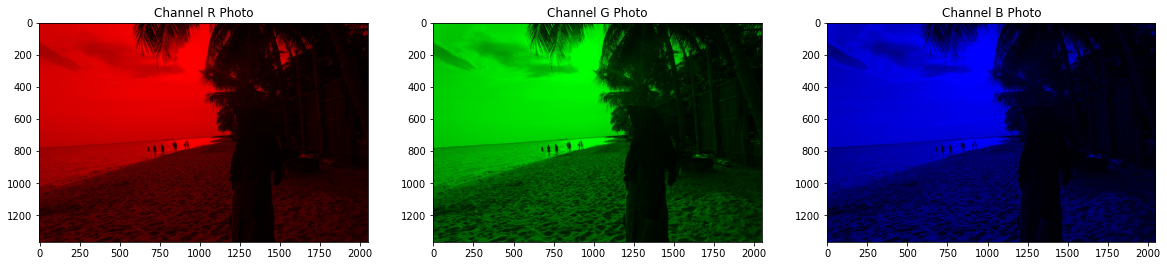

<Figure size 432x288 with 0 Axes>

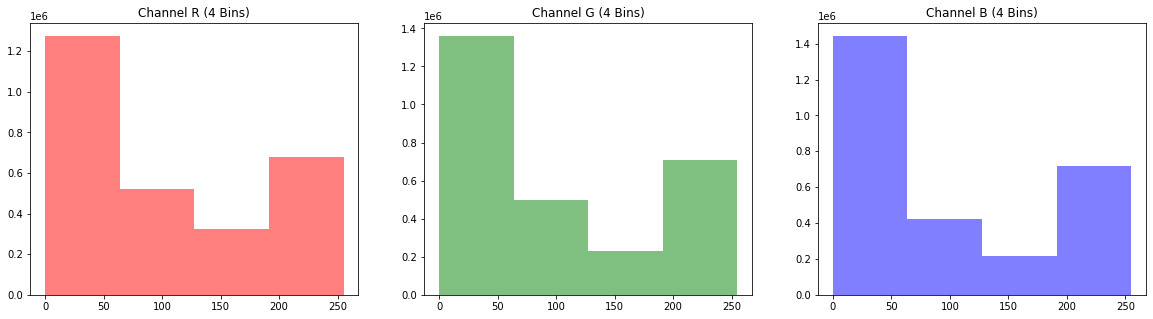

<Figure size 432x288 with 0 Axes>

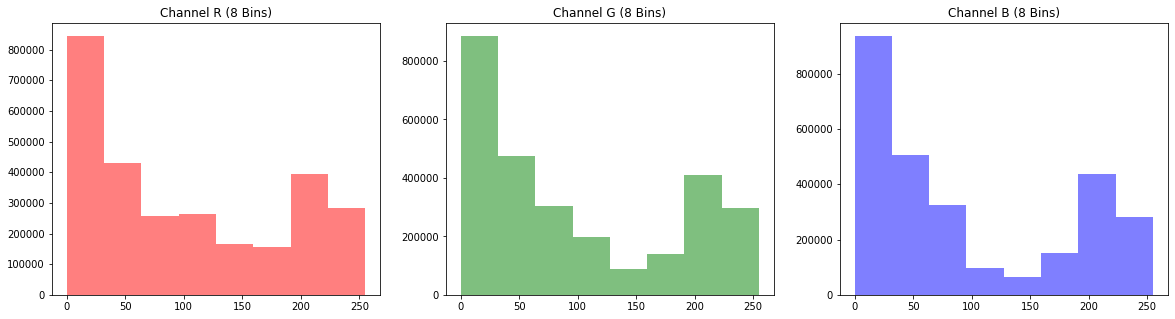

<Figure size 432x288 with 0 Axes>

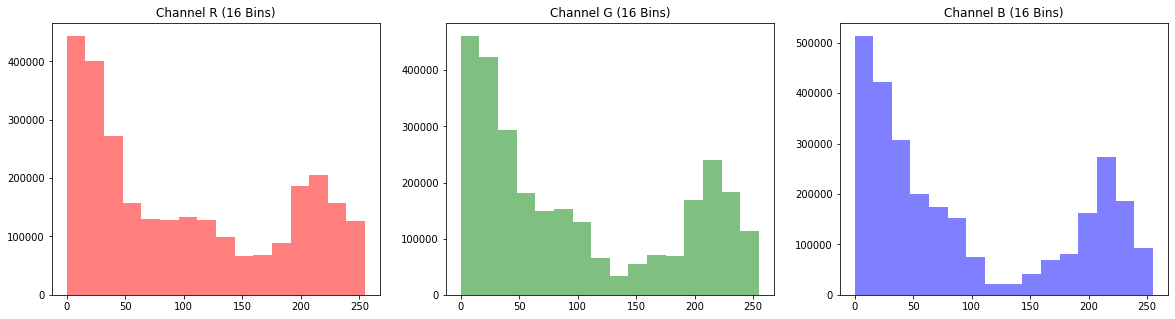

<Figure size 432x288 with 0 Axes>

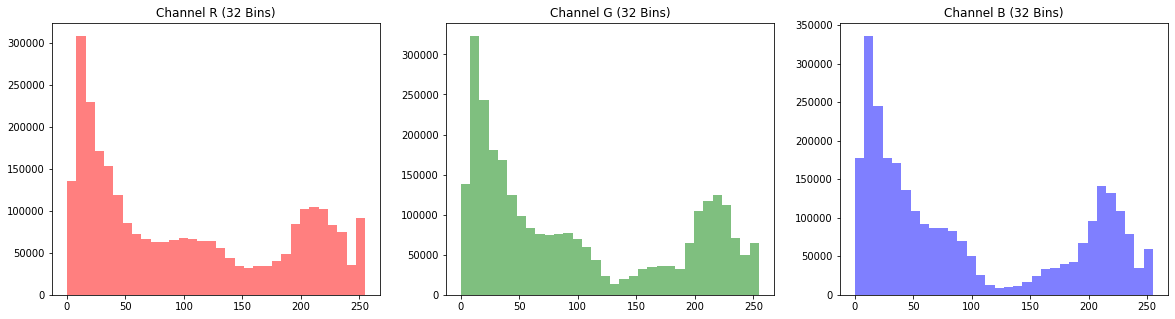

<Figure size 432x288 with 0 Axes>

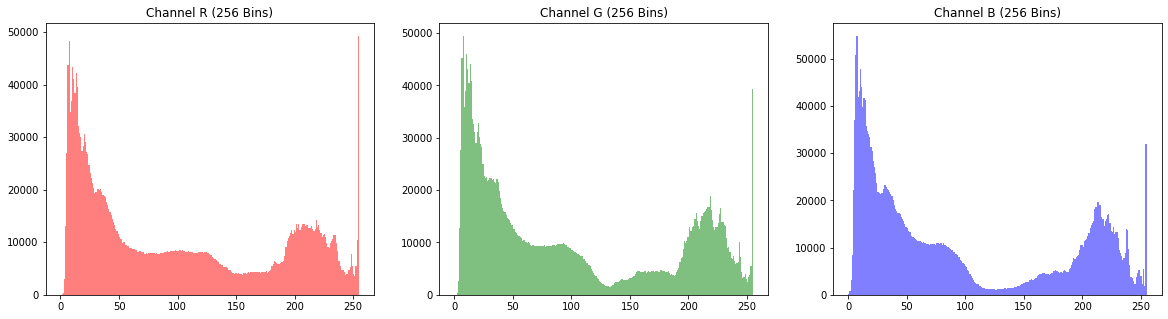

In [ ]:
# foto gelap per-channel dan per-bins

def gelap_bins():
  show_rgb("/red_gelap.jpg", "/green_gelap.jpg", "/blue_gelap.jpg")
  figure(0)
  rgb_bins("/gelap.jpg", 4, "Foto Gelap", "Channel R (4 Bins)", "Channel G (4 Bins)", "Channel B (4 Bins)")
  figure(1) 
  rgb_bins("/gelap.jpg", 8, "Foto Gelap", "Channel R (8 Bins)", "Channel G (8 Bins)", "Channel B (8 Bins)")
  figure(2)
  rgb_bins("/gelap.jpg", 16, "Foto Gelap", "Channel R (16 Bins)", "Channel G (16 Bins)", "Channel B (16 Bins)")
  figure(3)
  rgb_bins("/gelap.jpg", 32, "Foto Gelap", "Channel R (32 Bins)", "Channel G (32 Bins)", "Channel B (32 Bins)")
  figure(4)
  rgb_bins("/gelap.jpg", 256, "Foto Gelap", "Channel R (256 Bins)", "Channel G (256 Bins)", "Channel B (256 Bins)")

gelap_bins()